In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_orig = pd.read_csv('equity_stocks.csv')

df_orig.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust,Date,Adjusted
0,1/3/2012,EQTY,Equity Bank,18.5,34.25,16.5,17.00,16.70,16.40,0.3,1.80%,"141,700",-,NaN,NaN
1,1/4/2012,EQTY,Equity Bank,18.5,34.25,16.4,16.80,16.55,16.70,-0.15,0.91%,"912,500",-,NaN,NaN
2,1/5/2012,EQTY,Equity Bank,18.5,34.25,15.8,16.75,16.15,16.55,-0.4,2.48%,"748,700",-,NaN,NaN
3,1/6/2012,EQTY,Equity Bank,18.5,34.25,15.5,16.00,15.80,16.15,-0.35,2.22%,"3,510,000",-,NaN,NaN
4,1/9/2012,EQTY,Equity Bank,18.5,34.25,15.8,16.50,15.95,15.80,0.15,0.94%,"1,090,000",-,NaN,NaN


## Clean the data by handling missing values
Remove and fill the missing values in some columns

**Columns Removed:**
- Adjust
- Date
- Adjusted
- Code
- Name

In [3]:
# Make a copy of the df that I will manipulate
df = df_orig.copy()

df.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust,Date,Adjusted
0,1/3/2012,EQTY,Equity Bank,18.5,34.25,16.5,17.00,16.70,16.40,0.3,1.80%,"141,700",-,NaN,NaN
1,1/4/2012,EQTY,Equity Bank,18.5,34.25,16.4,16.80,16.55,16.70,-0.15,0.91%,"912,500",-,NaN,NaN
2,1/5/2012,EQTY,Equity Bank,18.5,34.25,15.8,16.75,16.15,16.55,-0.4,2.48%,"748,700",-,NaN,NaN
3,1/6/2012,EQTY,Equity Bank,18.5,34.25,15.5,16.00,15.80,16.15,-0.35,2.22%,"3,510,000",-,NaN,NaN
4,1/9/2012,EQTY,Equity Bank,18.5,34.25,15.8,16.50,15.95,15.80,0.15,0.94%,"1,090,000",-,NaN,NaN


In [4]:
df.isna().sum()

DATE          248
CODE            0
NAME            0
12m Low         0
12m High        0
Day Low         0
Day High        0
Day Price       0
Previous        0
Change          0
Change%         0
Volume          0
Adjust        248
Date         1252
Adjusted     1252
dtype: int64

In [5]:
# Remove columns with a lot of missing values, and the Code and Name
columns = ['Adjust', 'Date', 'Adjusted', 'CODE', 'NAME']

df = df.drop(columns, axis=1)

df.head()

,DATE,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume
0,1/3/2012,18.5,34.25,16.5,17.00,16.70,16.40,0.3,1.80%,"141,700"
1,1/4/2012,18.5,34.25,16.4,16.80,16.55,16.70,-0.15,0.91%,"912,500"
2,1/5/2012,18.5,34.25,15.8,16.75,16.15,16.55,-0.4,2.48%,"748,700"
3,1/6/2012,18.5,34.25,15.5,16.00,15.80,16.15,-0.35,2.22%,"3,510,000"
4,1/9/2012,18.5,34.25,15.8,16.50,15.95,15.80,0.15,0.94%,"1,090,000"


In [6]:
# Drop rows that have missing values
df = df.dropna(subset=['DATE'])

df.isna().sum()

DATE         0
12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Change       0
Change%      0
Volume       0
dtype: int64

In [7]:
# Convert date column to datetime type
df["DATE"] = pd.to_datetime(df['DATE'], format='%d/%m/%Y', errors='coerce')


# Extract Date Data to Different Columns
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['day'] = df['DATE'].dt.day

# Drop the date column
df = df.drop("DATE", axis=1)

df.head()

,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,year,month,day
0,18.5,34.25,16.5,17.00,16.70,16.40,0.3,1.80%,"141,700",2012.0,3.0,1.0
1,18.5,34.25,16.4,16.80,16.55,16.70,-0.15,0.91%,"912,500",2012.0,4.0,1.0
2,18.5,34.25,15.8,16.75,16.15,16.55,-0.4,2.48%,"748,700",2012.0,5.0,1.0
3,18.5,34.25,15.5,16.00,15.80,16.15,-0.35,2.22%,"3,510,000",2012.0,6.0,1.0
4,18.5,34.25,15.8,16.50,15.95,15.80,0.15,0.94%,"1,090,000",2012.0,9.0,1.0


In [8]:
df.to_csv('2-equity-stocks.csv')

In [9]:
df = df.replace('-', np.nan)

df.isna().sum()

12m Low        0
12m High       0
Day Low        0
Day High       0
Day Price      0
Previous       0
Change       318
Change%      318
Volume         0
year         765
month        765
day          765
dtype: int64

In [10]:
# Remove columns with a lot of missing values, and the Code and Name
columns = ['year', 'month', 'day', 'Change%', 'Change']

df = df.drop(columns, axis=1)

df.head()

,12m Low,12m High,Day Low,Day High,Day Price,Previous,Volume
0,18.5,34.25,16.5,17.00,16.70,16.40,"141,700"
1,18.5,34.25,16.4,16.80,16.55,16.70,"912,500"
2,18.5,34.25,15.8,16.75,16.15,16.55,"748,700"
3,18.5,34.25,15.5,16.00,15.80,16.15,"3,510,000"
4,18.5,34.25,15.8,16.50,15.95,15.80,"1,090,000"


In [11]:
# Remove commas and convert to numeric
df['Volume'] = df['Volume'].str.replace(',', '').astype(float)

df.isna().sum()

12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Volume       0
dtype: int64

## Predictions 
### Using Nearest Neighbors 

In [12]:
from sklearn.model_selection import train_test_split


np.random.seed(42)

# Create the data
X = df.drop('Day Price', axis=1)
y = df['Day Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.head()

,12m Low,12m High,Day Low,Day High,Previous,Volume
66,19.50,36.50,19.30,19.5,19.25,4630000.0
67,19.50,36.50,19.40,19.6,19.40,7510000.0
382,19.55,36.50,16.35,16.8,16.55,5660000.0
211,19.00,34.25,24.00,24.5,24.25,3040000.0
12,18.50,34.25,15.90,16.0,15.90,2100000.0


In [13]:
from sklearn.neighbors import KNeighborsRegressor as KNN


np.random.seed(42)

# Initiate the model
knn = KNN(n_neighbors=7)

# Fit the model
knn.fit(X_train, y_train)

# Check score
knn.score(X_test, y_test)

0.4778416017351387

### Linear Regression Prediction

In [14]:
from sklearn.linear_model import LinearRegression


np.random.seed(42)

# Initiate the model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Check score
lr.score(X_test, y_test)

0.9997403267601818

### Random Forest Regressor Prediction

In [15]:
from sklearn.ensemble import RandomForestRegressor as RFR


np.random.seed(42)

# Initiate the model
rf = RFR()

# Fit the model
rf.fit(X_train, y_train)

# Check score
rf.score(X_test, y_test)

0.9989781750886335

## Evaluate the regressors

In [16]:
from sklearn.metrics import r2_score, root_mean_squared_error, mean_squared_error

models = {
    "KNeighbors Regressor": knn,
    "Linear Regressor": lr,
    "Random Forest Regressor": rf
}

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)

    results[name] = {
        "Mean Squared Error": mse,
        "Root Mean Squared Error": rmse,
        "R-square (R2)": r2
    }

# Convert the dictionary to a DataFrame
table = pd.DataFrame(results).T
table


,Mean Squared Error,Root Mean Squared Error,R-square (R2)
KNeighbors Regressor,1967.948608,44.361567,0.477842
Linear Regressor,0.978675,0.989280,0.999740
Random Forest Regressor,3.851128,1.962429,0.998978


### Evaluation using Residual Plot

`Residual = Actual - Predicted`

Residuals need to be centered around 0, otherwise model has bias

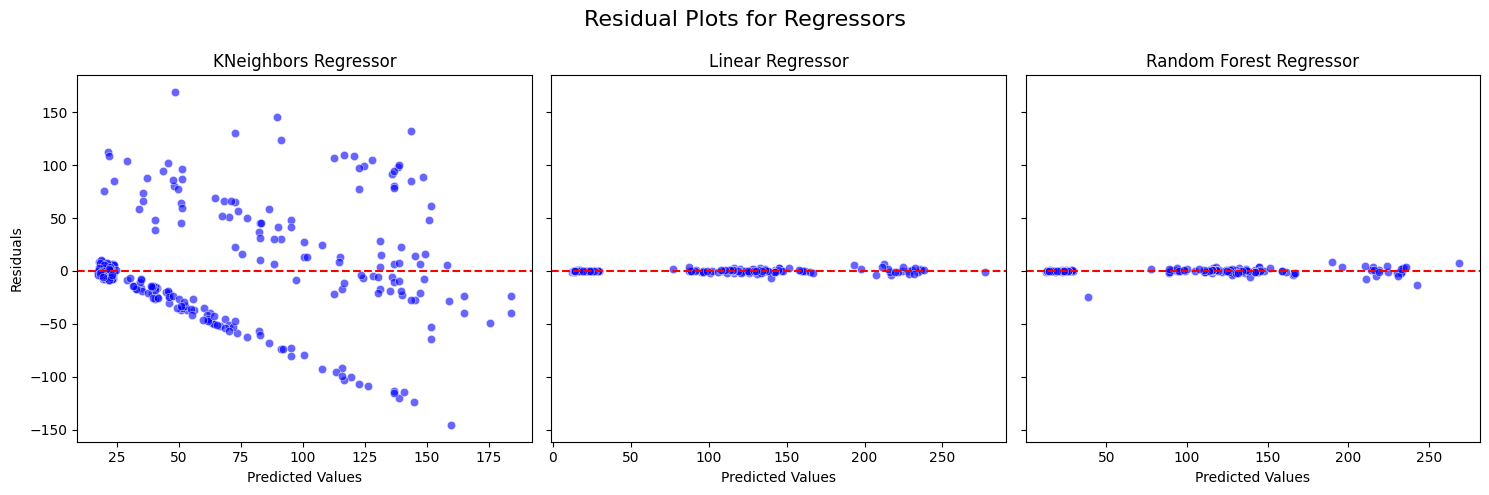

In [18]:
# Initialize a plot grid
fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(15, 5), sharey=True)
fig.suptitle("Residual Plots for Regressors", fontsize=16)

# Loop through models to create residual plots
for i, (name, model) in enumerate(models.items()):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate residuals
    residuals = y_test - y_pred
    
    # Plot residuals
    ax = axes[i]
    sns.scatterplot(x=y_pred, y=residuals, ax=ax, color='blue', alpha=0.6)
    ax.axhline(0, color='red', linestyle='--')  # Horizontal line at residual = 0
    ax.set_title(name)
    ax.set_xlabel("Predicted Values")
    ax.set_ylabel("Residuals" if i == 0 else "")  # Only label y-axis for first plot

plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust title position
plt.show()

## Evaluation using Error Plot

There should be uniform scatter of points around the line (consistent)

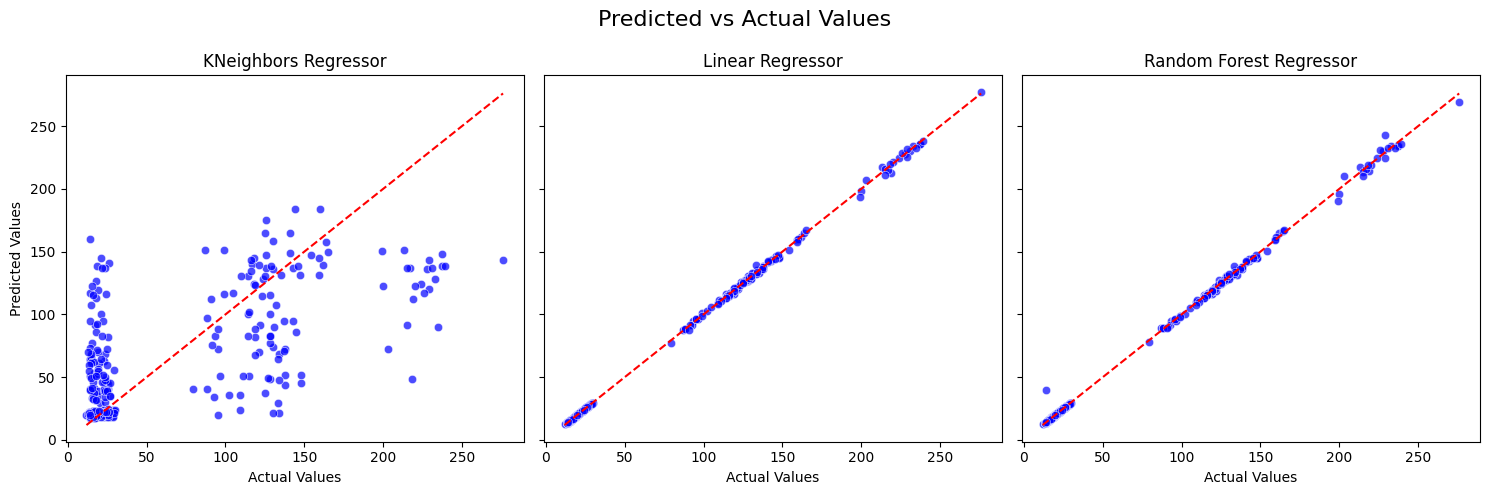

In [21]:
# Initialize a plot grid
fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(15, 5), sharey=True)
fig.suptitle("Predicted vs Actual Values", fontsize=16)

# Loop through models to create the predicted vs actual plots
for i, (name, model) in enumerate(models.items()):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Plot actual vs predicted
    ax = axes[i]
    sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='blue', alpha=0.7)
    
    # Add a reference line (y = x) for perfect predictions
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    
    # Titles and labels
    ax.set_title(name)
    ax.set_xlabel("Actual Values")
    ax.set_ylabel("Predicted Values" if i == 0 else "")  # Label y-axis only for the first plot

plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust title position
plt.show()